In [87]:
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv('spam.csv',encoding="windows-1252")

In [89]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5039,spam,Natalie (20/F) is inviting you to be her frien...,NaN,NaN,NaN
2015,ham,Just re read it and I have no shame but tell m...,NaN,NaN,NaN
1116,ham,Hey... What time is your driving on fri? We go...,NaN,NaN,NaN
295,spam,T-Mobile customer you may now claim your FREE ...,NaN,NaN,NaN
4117,ham,Watch lor. I saw a few swatch one i thk quite ...,NaN,NaN,NaN


In [90]:
df = df.drop(columns=['Unnamed: 3','Unnamed: 2','Unnamed: 4'])

In [91]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [94]:
df.duplicated().sum()

np.int64(403)

In [95]:
df=df.drop_duplicates(keep='first')

In [96]:
df.duplicated().sum()

np.int64(0)

In [97]:
df.shape

(5169, 2)

In [98]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
le = OrdinalEncoder()

In [101]:
(df['target'])=le.fit_transform(df[['target']])

In [102]:
df.head()

,target,text
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [104]:
df['target'].value_counts()

target
0.0    4516
1.0     653
Name: count, dtype: int64

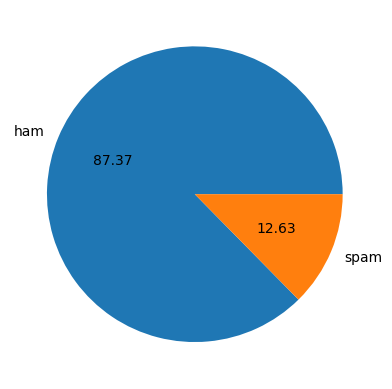

In [105]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [106]:
# Data is imbalance

In [107]:
!pip install nltk

In [108]:
import nltk

In [109]:
nltk.download('punkt', quiet=True)
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/farhanakhtar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [110]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/farhanakhtar/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/farhanakhtar/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/farhanakhtar/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/farhanakhtar/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/farhanakhtar/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru

True

In [111]:
df['num_characters'] = df['text'].apply(len)

In [112]:
df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [113]:
df['num_sentences']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [114]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0.0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0.0,Ok lar... Joking wif u oni...,29,8,2
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0.0,U dun say so early hor... U c already then say...,49,13,1
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [115]:
df.iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [116]:
# Ham mssgs
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
# spam mssgs
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [118]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

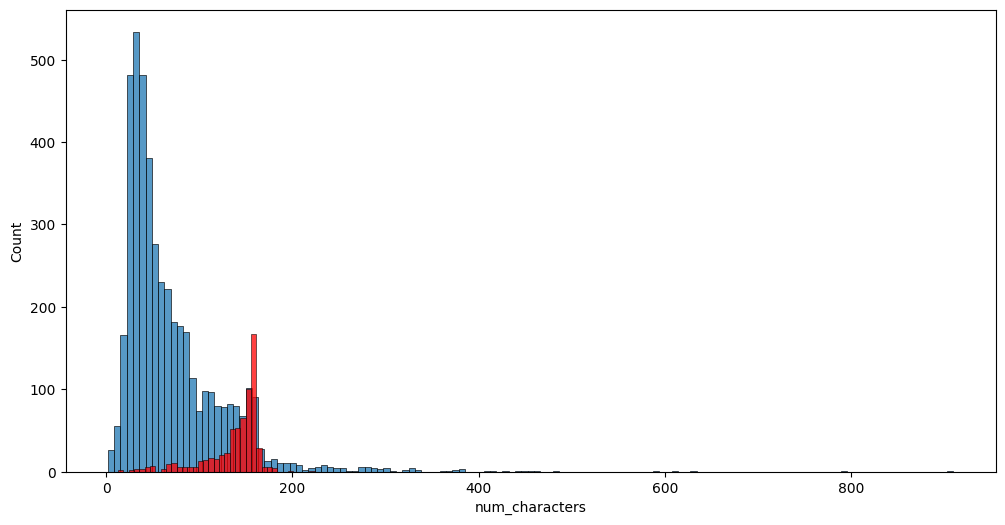

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],label='ham')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

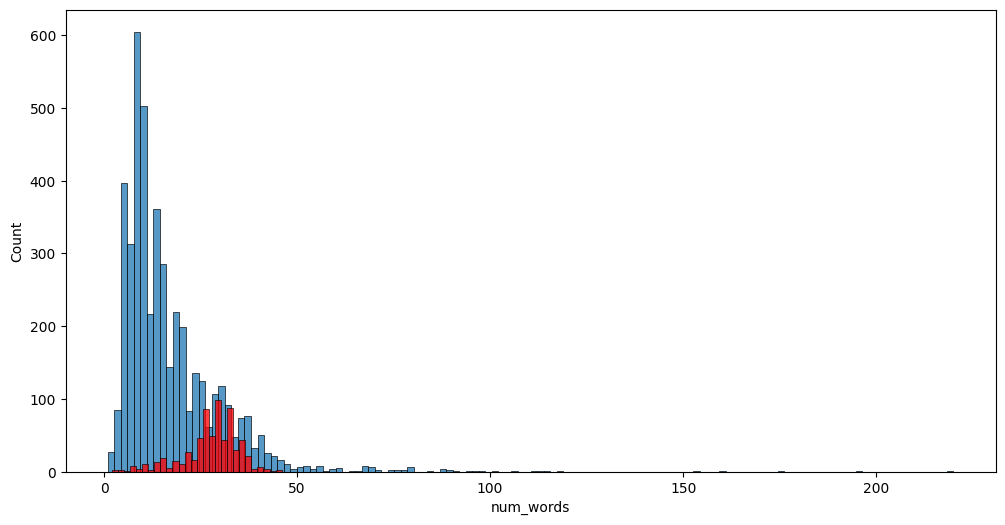

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],label='ham')
sns.histplot(df[df['target']==1]['num_words'],color='red')

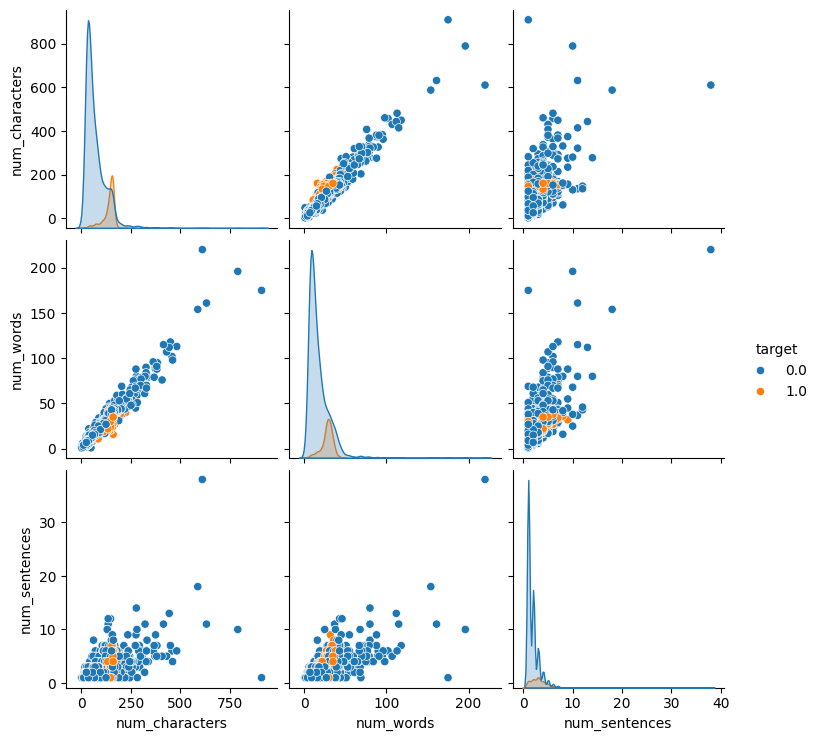

In [121]:
sns.pairplot(df,hue='target')

 ## Data Preprocessing
 ### Lower Case
 ### Tokenization
 ### Removing Special Character
 ### Removing stop words and punctutaion
 ### Stemming

In [122]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [124]:
def transform_text(text):
    text = text.lower()                         # lowercase
    tokens = nltk.word_tokenize(text)                # tokenize
    y = []
    for i in tokens:
        if i.isalnum():                         # keep only alphanumeric
            if i not in stopwords.words("english") and i not in string.punctuation:
                y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [125]:
transform_text("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [126]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [127]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [128]:
df['transform_text'] = df['text'].apply(transform_text)

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0.0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0.0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0.0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [130]:
from wordcloud import WordCloud

In [131]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [132]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

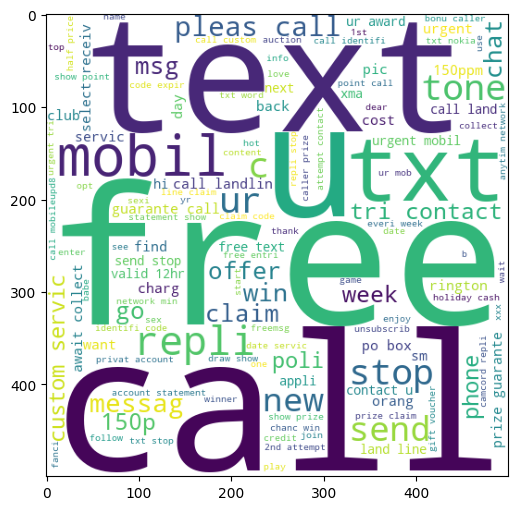

In [133]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [134]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

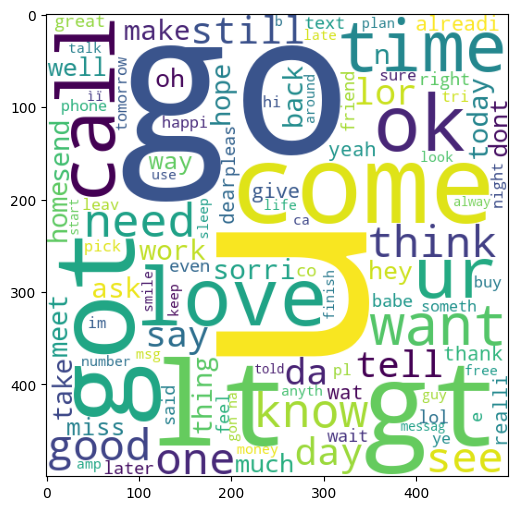

In [135]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [136]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0.0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0.0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0.0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0.0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
spam_corpus = []
for mssg in df[df['target']==1]['transform_text'].tolist():
    for word in mssg.split():
        spam_corpus.append(word)

In [138]:
len(spam_corpus)

9939

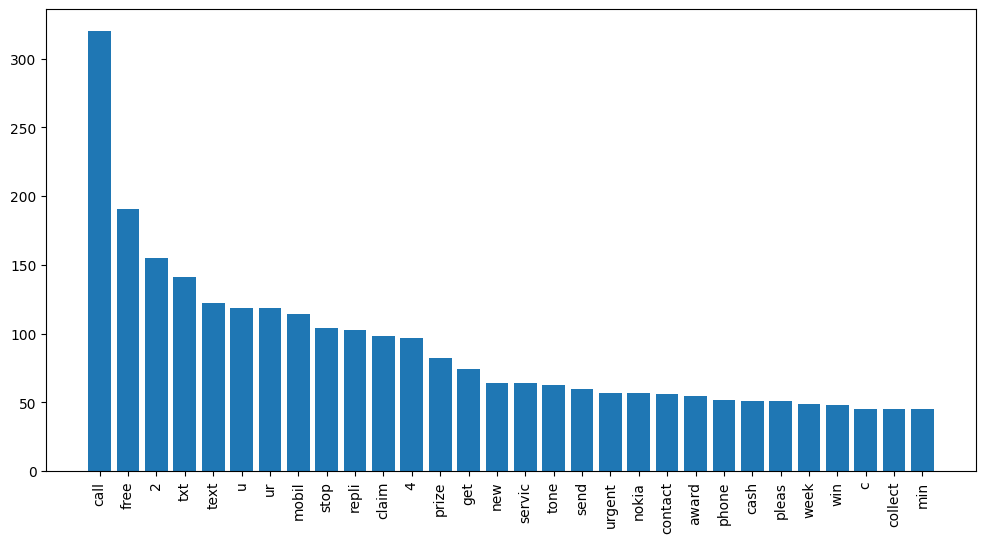

In [139]:
from collections import Counter
plt.figure(figsize=(12,6))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') 
plt.show()

In [140]:
ham_corpus = []
for mssg in df[df['target']==0]['transform_text'].tolist():
    for word in mssg.split():
        ham_corpus.append(word)

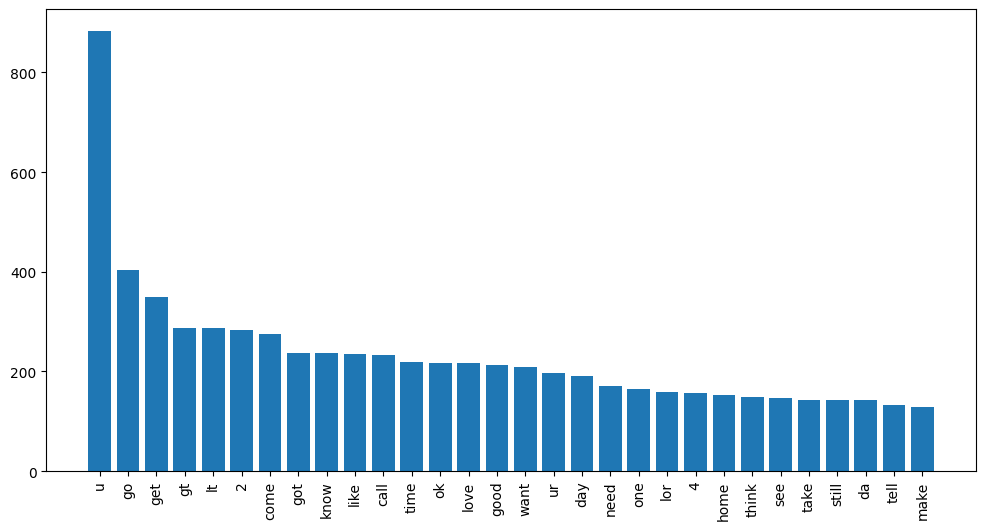

In [141]:
plt.figure(figsize=(12,6))
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') 
plt.show()

## Model Building

In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [143]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [144]:
X.shape

(5169, 3000)

In [145]:
y = df['target'].values

In [146]:
y

array([0., 0., 1., ..., 0., 0., 0.], shape=(5169,))

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [152]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

# Going with mnb

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [153]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [154]:
# choose tfidf -> mnb

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [157]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [158]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [159]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [160]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("------------------------------")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
------------------------------
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
------------------------------
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
------------------------------
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
------------------------------
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
------------------------------
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
------------------------------
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
------------------------------
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
------------------------------
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
------------------------------
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
------------------------------

In [161]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [162]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837
3,DT,0.930368,0.817308


In [163]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [164]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [165]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [ ]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [171]:
#voting.fit(X_train,y_train)

In [168]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [172]:
import pickle
# Fit the Multinomial Naive Bayes model before saving
#mnb.fit(X_train, y_train)

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))